In [1]:
from pymongo import MongoClient
from collections import OrderedDict

import matplotlib.pyplot as plt

In [5]:
# client = MongoClient("192.168.0.21", 27017)
client = MongoClient('71.223.66.160')
print("Authentatied:", client.spectral_profiler.authenticate('kelvin', 'Otacon1105'))

Authentatied: True


In [7]:
spot_collection = client.spectral_profiler.spot_data
spot_data = spot_collection.find_one()

# The REF data is stored as a string, so form a string assigning it as if it were a literal
# then call `exec` ro run the code, probably not the best method, but it works
python_string = 'plot_dict = ' + spot_data["REF1"]
exec(python_string)

Number of elements:  251


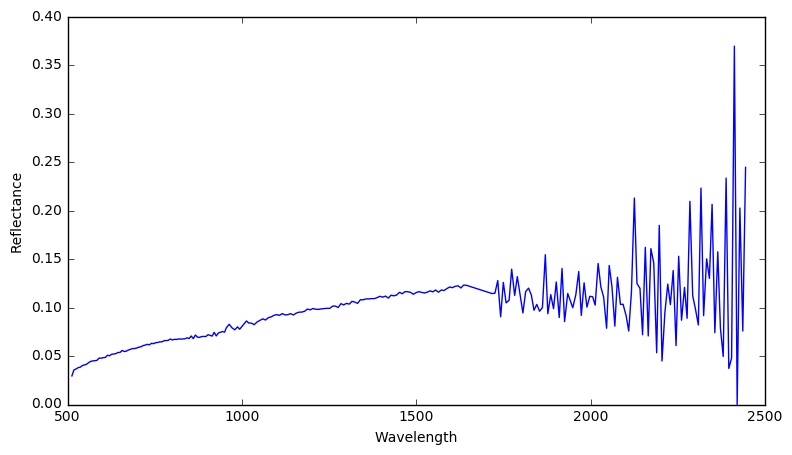

In [8]:
# Convert strings to numbers then sort the dict, this hacked method is expensive, do not recommend
wavelength = [float(w) for w in plot_dict.keys() if float(w) <= 2450]
print('Number of elements: ', len(wavelength))
list.sort(wavelength)
sorted_dict = OrderedDict((key, plot_dict[str(key)]) for key in wavelength)
reflectance = [ref for ref in sorted_dict.values()]

# plot it
plt.figure(figsize=(9,5))
plt.plot(wavelength, reflectance, color='b', linestyle='-', linewidth = 1, label='Wavelength')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

In [9]:
spot_data["ancillarydata"]

'{"SPACECRAFT_CLOCK_COUNT":902206645.9406820536,"VIS_FOCAL_PLANE_TEMPERATURE":19.2000007629,"NIR1_FOCAL_PLANE_TEMPERATURE":16.4599990845,"NIR2_FOCAL_PLANE_TEMPERATURE":243.0,"SPECTROMETER_TEMPERATURE_1":16.7099990845,"SPECTROMETER_TEMPERATURE_2":20.0,"SPECTROMETER_TEMPERATURE_3":17.0499992371,"SPECTROMETER_TEMPERATURE_4":22.4200000763,"HALOGEN_BULB_RADIANCE":4.7589998245,"HALOGEN_BULB_VOLTAGE1":4.7589998245,"HALOGEN_BULB_VOLTAGE2":4.7589998245,"HALOGEN_BULB_TEMPERATURE1":7.8099999428,"HALOGEN_BULB_TEMPERATURE2":7.8099999428,"SPACECRAFT_ALTITUDE":100.4962005615,"SPACECRAFT_GROUND_SPEED":1.5443203449,"SUB_SPACECRAFT_LATITUDE":-70.7102994901,"SUB_SPACECRAFT_LONGITUDE":160.6294202187,"CENTER_LATITUDE":-70.7620361511,"CENTER_LONGITUDE":160.611921773,"EMISSION_ANGLE":0.9519629478,"SPACECRAFT_AZIMUTH":6.3752999306,"INCIDENCE_ANGLE":80.4272918701,"SOLAR_AZIMUTH_ANGLE":299.1752624512,"PHASE_ANGLE":80.0595397949,"SP_TEMPERATURE":19.7222003937,"SP_PELTIER_HOT_TEMPERATURE":-19.5622005463,"SP_N2_RA

In [10]:
# Get the image metadata for the file
spot_file = spot_data['file']

# look for all points in the file
print("Current Image File: ",spot_file)

image_collection = client.spectral_profiler.image_data
image_spots = spot_collection.find({'file':spot_file})

Current Image File:  /work/projects/jaxa02/SP_Level2C/02/2008/08/08/SP_2C_02_03709_S713_E1607.sl2


In [11]:
# Get the center longitude and center lattitude for each spot
point_list = []
ref_list = []

for spot in image_spots:
    python_string = 'spot_dict = ' + spot['ancillarydata']
    exec(python_string)
    
    python_string = 'ref_dict = ' + spot_data["REF1"]
    exec(python_string)
    
    point = (spot_dict['CENTER_LONGITUDE'], spot_dict['CENTER_LATITUDE'])
    point_list.append(point)
    ref_list.append(ref_dict['512.6'])
    

print(point_list, '\n')
print(ref_list, '\n')


[(160.611921773, -70.7620361511), (160.6101292078, -70.7435009086), (160.6083398596, -70.7249657558), (160.6065537192, -70.7064306928), (160.6047547706, -70.6878993039), (160.6029573891, -70.669368378), (160.6011632204, -70.6508375327), (160.599372256, -70.6323067775), (160.5975844868, -70.6137761124), (160.7348861858, -71.9298244992), (160.7328600596, -71.9112888613), (160.7308384275, -71.8927542359), (160.728820691, -71.8742196971), (160.726806838, -71.8556852447), (160.7247968572, -71.837150885), (160.7227781671, -71.8186168533), (160.7207397054, -71.800083383), (160.7187051498, -71.7815499895), (160.7166744891, -71.7630166821), (160.7146477121, -71.7444834671), (160.7126248058, -71.7259503323), (160.7105964921, -71.7074190304), (160.7085704428, -71.6888881209), (160.7065482539, -71.6703572946), (160.7045299151, -71.651826567), (160.7025154122, -71.6332959138), (160.7004948953, -71.6147658499), (160.6984605561, -71.596236775), (160.6964300718, -71.5777077897), (160.6944034306, -71.5

In [14]:
output_notebook()

Loading BokehJS ...

In [15]:
from bokeh.plotting import figure, output_notebook, show
x_range, y_range = ((180,140), (-74,-69))

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)
x_points = []
y_points = []

for point in point_list:
    x_points.append(point[0])
    y_points.append(point[1])

p = base_plot()
p.circle(x=x_points, y=y_points, **options)
show(p)